In [135]:
#Importamos las librería necesarias

In [136]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from keras.src.layers import GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import zipfile

In [137]:
# Definimos los directorios

In [138]:
dataset_path = "archive.zip"

In [139]:
# Tamaño estándar para redes neuronales

In [140]:
IMG_SIZE = (128, 128)

In [141]:
# Cargamos imágenes y sus etiquetas

In [142]:
X, Y = [], []

In [143]:
# Cargar imágenes

In [144]:
for img_id in os.listdir(cropped_path)[:1000]:
    cropped_img = cv2.imread(os.path.join(cropped_path, img_id))
    simplified_img = cv2.imread(os.path.join(simplified_path, img_id))

    if cropped_img is None or simplified_img is None:
        print(f" Problema al cargar {img_id}")
    else:
        # Redimensionar las imágenes
        cropped_img = cv2.resize(cropped_img, IMG_SIZE)
        simplified_img = cv2.resize(simplified_img, IMG_SIZE)

        # Promediar las imágenes
        final_img = (cropped_img + simplified_img) / 2

        X.append(final_img)

        # Obtener etiqueta a partir del nombre del archivo (aquí se asigna una clase numérica)
        label = int(img_id.split('.')[0]) % 20  # Ejemplo simple para 20 clases (mod 20)
        Y.append(label)

In [145]:
X = np.array(X)
Y = np.array(Y)

In [146]:
print(f"Tamaño de X: {X.shape}")
print(f"Tamaño de Y: {Y.shape}")

Tamaño de X: (1000, 128, 128, 3)
Tamaño de Y: (1000,)


In [147]:
Y = to_categorical(Y, num_classes=20)

In [148]:
# Dividir el dataset en entrenamiento y validación

In [149]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)


In [150]:
# Normalizar las imágenes

In [151]:
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de Y_train: {Y_train.shape}")
print(f"Tamaño de X_val: {X_val.shape}")
print(f"Tamaño de Y_val: {Y_val.shape}")

Tamaño de X_train: (800, 128, 128, 3)
Tamaño de Y_train: (800, 20)
Tamaño de X_val: (200, 128, 128, 3)
Tamaño de Y_val: (200, 20)


In [152]:
# Creación de generadores de datos para aumento de datos

In [153]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [154]:
# Ajustar el generador de datos en las imágenes de entrenamiento

In [155]:
datagen.fit(X_train)

In [156]:
# Usar ResNet50 como base para transfer learning

In [157]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))


In [158]:
# Crear el modelo

In [159]:
odel = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax')  # 20 clases
])

In [160]:
# Compilar el modelo con un optimizador con tasa de aprendizaje ajustada

In [161]:
# Compilar el modelo con un optimizador con tasa de aprendizaje ajustada
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

NameError: name 'model' is not defined

In [162]:
# Entrenar el modelo con aumento de datos

In [163]:
history = model.fit(datagen.flow(X_train, Y_train, batch_size=32),
                    validation_data=(X_val, Y_val),
                    epochs=10)


NameError: name 'model' is not defined

In [164]:
# Graficar la precisión y la pérdida durante el entrenamiento

In [165]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [166]:
# Precisión de entrenamiento y validación

NameError: name 'history' is not defined

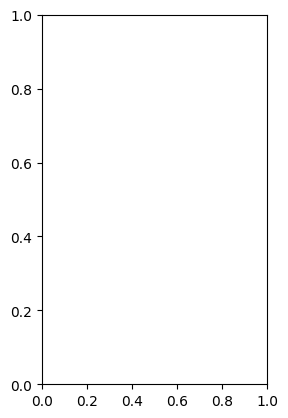

In [167]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()

In [168]:
# Pérdida de entrenamiento y validación

NameError: name 'history' is not defined

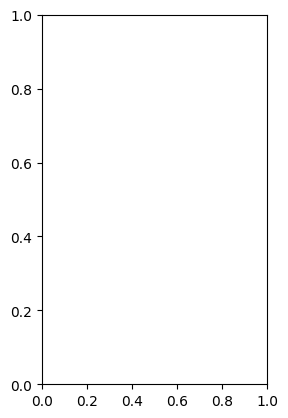

In [169]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [170]:
# Evaluar el modelo

In [171]:
train_accuracy = model.evaluate(X_train, Y_train, verbose=0)
val_accuracy = model.evaluate(X_val, Y_val, verbose=0)

print(f"Exactitud de entrenamiento: {train_accuracy[1]}")
print(f"Exactitud de validación: {val_accuracy[1]}")

NameError: name 'model' is not defined